# Multiple Linear Regression Model

### About Dataset
#### Description:
The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.



In [1]:
# Lets import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.formula.api as sfa
import statsmodels.api as sma

# VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor 

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, RFECV

import warnings
warnings.filterwarnings('ignore')

### Data Preprocessing

In [2]:
# Lets import the Dataset

student = pd.read_csv('Student_Performance.csv')

In [3]:
# Descriptive analysis of the data

student.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Studied,10000.0,4.9929,2.589309,1.0,3.0,5.0,7.0,9.0
Previous Scores,10000.0,69.4457,17.343152,40.0,54.0,69.0,85.0,99.0
Sleep Hours,10000.0,6.5306,1.695863,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,10000.0,4.5833,2.867348,0.0,2.0,5.0,7.0,9.0
Performance Index,10000.0,55.2248,19.212558,10.0,40.0,55.0,71.0,100.0


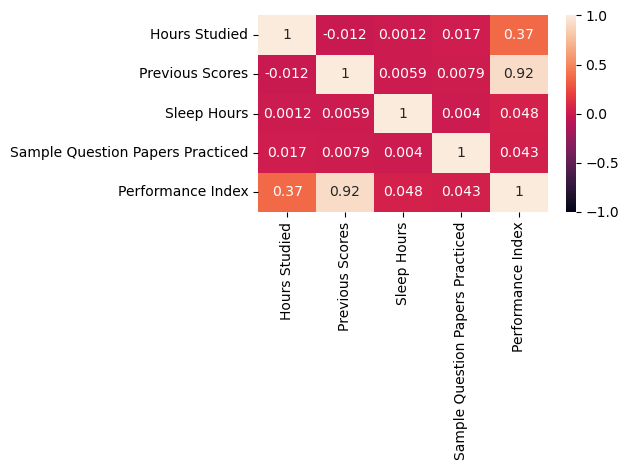

In [4]:
# Lets make a heatmap of the correlation between various Numerical columns

sns.heatmap(student.corr(), annot=True, vmax=1, vmin=-1)
plt.tight_layout()
plt.show()

#### Inferences
* Previous Scores and hours studies has a strong positive relationship with out Target variable ('Performance Index')

### Univariate Analysis

In [5]:
num_cols = student.select_dtypes(include=np.number)

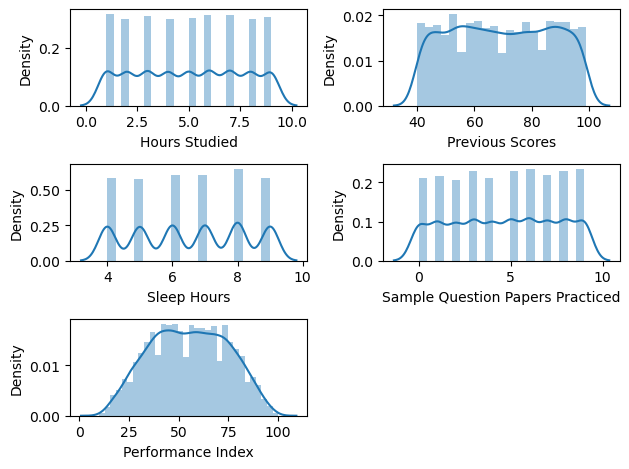

In [6]:
# univariate analysis of all the numerical columns

t = 1
for i in num_cols:
    plt.subplot(3,2,t)
    sns.distplot(student[i])
    t += 1
plt.tight_layout()
plt.show()

Inferences
* All The x variables are almost uniformly distributed

<Axes: xlabel='Extracurricular Activities'>

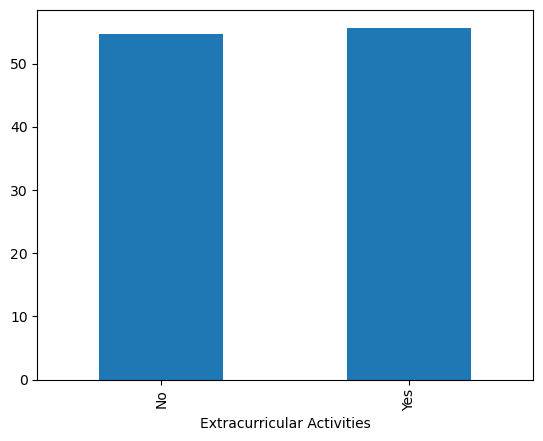

In [7]:
# categorical variable
student.groupby(by = ['Extracurricular Activities'])['Performance Index'].mean().plot(kind = 'bar')

Inferences
* Both the students who are participating in Extracurricular Activities and are not participating 
has the same effect on the performance index as per the above visualisation as of now we have not have any statistical proof

### Bivariate analysis

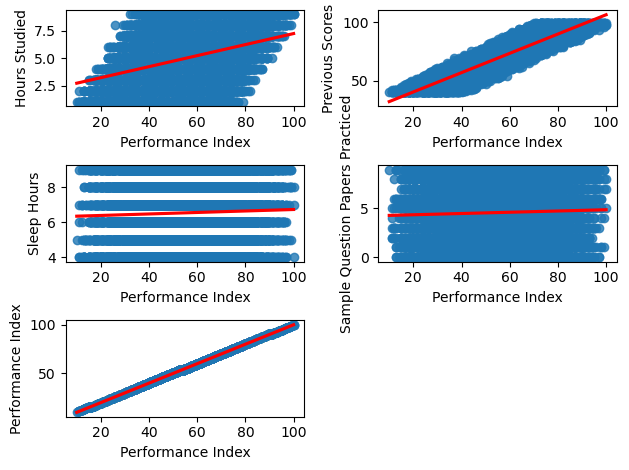

In [8]:
# Now we will compare all the numerical column with our target variable

t = 1 
for i in num_cols:
    plt.subplot(3,2,t)
    sns.regplot(data = student, x = 'Performance Index', y = i, line_kws={'color':'red'})
    t += 1
plt.tight_layout()
plt.show()

Inferences
* As seen in the heatmap you can see here also the corelation between our variables

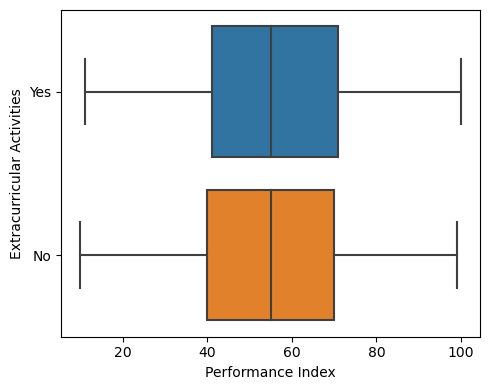

In [9]:
# Categorical Variable with Target Variable

plt.figure(figsize=(5,4))
sns.boxplot(data = student, x = 'Performance Index', y = 'Extracurricular Activities')
plt.tight_layout()
plt.show()

Inferences
* We can have an idea about the distribution of the datapoints 

#### Treating the anomalies

In [10]:
student.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

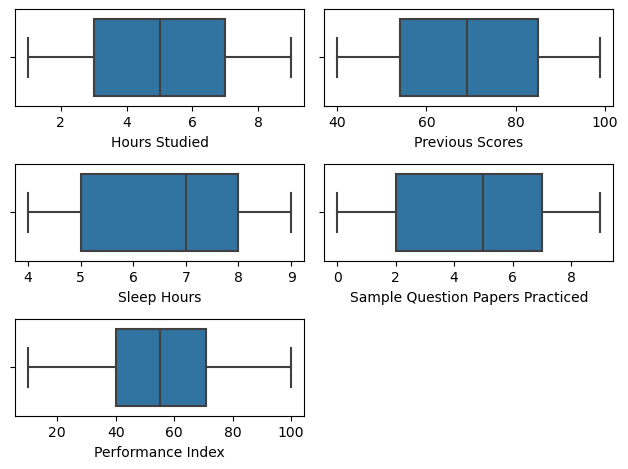

In [11]:
# Outliers
t = 1 
for i in num_cols:
    plt.subplot(3,2,t)
    sns.boxplot(data = student, x = i)
    t += 1
plt.tight_layout()
plt.show()

Inference
* No Outliers

### Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
student['Extracurricular Activities'] = encoder.fit_transform(student['Extracurricular Activities'])

In [13]:
student.head(2)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0


#### Lets build a model


##### We will check for some assumptions first
##### Assumption 1: The Target varibale should be numerical

In [17]:
# We will check for some assumptions first
# Assumption 1: The Target varibale should be numerical

student['Performance Index'].describe()

count    10000.000000
mean        55.224800
std         19.212558
min         10.000000
25%         40.000000
50%         55.000000
75%         71.000000
max        100.000000
Name: Performance Index, dtype: float64

* The target variable is numerical

##### Assumption 2: Is there Multicolinearity

* Predictors variable should not be highly correlated amongst each other


In [18]:
# Train Test split 
x = student.drop(columns = ['Performance Index'])
y = student['Performance Index']

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8, random_state=0)

In [19]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(8000, 5) (2000, 5) (8000,) (2000,)


In [24]:
vif_list = []
for i in range(x_train.shape[1]):
    vif_list.append(variance_inflation_factor(x_train.values,i))
    
vif_list

pd.DataFrame({'Feautures name': x_train.columns, 'VIF':vif_list}).sort_values\
(by = 'VIF',ascending=False)

,Feautures name,VIF
1,Previous Scores,10.115571
3,Sleep Hours,9.854637
0,Hours Studied,4.248007
4,Sample Question Papers Practiced,3.347478
2,Extracurricular Activities,1.948486


* We are considering the VIF at 10 to be normal

#### 1. target should be number --> met
#### 2. multicolinearity --> met

### Building a model

In [29]:
x_train_c = sma.add_constant(x_train)
x_test_c = sma.add_constant(x_test)
model = sma.OLS(y_train,x_train_c).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Performance Index   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 1.425e+05
Date:                Sat, 18 Nov 2023   Prob (F-statistic):               0.00
Time:                        18:47:02   Log-Likelihood:                -17058.
No. Observations:                8000   AIC:                         3.413e+04
Df Residuals:                    7994   BIC:                         3.417e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                              -34.0752      0.141   -241.108      0.000     -34.352     -33.798
Hours Studied                        2.8519      0.009    323.531      0.000       2.835       2.869
Previous Scores                      1.0189      0.001    778.751      0.000       1.016       1.021
Extracurricular Activities           0.6653      0.046     14.568      0.000       0.576       0.755
Sleep Hours                          0.4768      0.013     35.428      0.000       0.450       0.503
Sample Question Papers Practiced     0.1878      0.008     23.588      0.000       0.172       0.203
==============================================================================
Omnibus:                        6.360   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                7.020
Skew:                           0.010   Prob(JB):                       0.0299
Kurtosis:                       3.144   Cond. No.                         448.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Assumptions after building the model
#### Assumption of Linearity
* The independent variables must have a linear relationship with the dependent variable


In [32]:
# We will apply a Statistical test to check for the linearity
from statsmodels.stats.diagnostic import linear_rainbow

#ho : That variables are linear
# ha: variables are not linear

pvalue = linear_rainbow(model)[1]

if pvalue < 0.05:
    print('reject ho')
else:
    print('fail to reject the ho:')

fail to reject the ho:


Inference
* The Variable have Linear Realtionship

#### Assumption of autocorrelation
* Assumption of autocorrelation is met
* a DW statistic close to 2 is generally considered acceptable, and deviations from 2 may indicate the presence of autocorrelation.

#### Assumption of homoskedascity of residuals
* We will perform a statistical test to check this assumption

In [34]:
pvalue = sma.stats.diagnostic.het_breuschpagan(resid = model.resid,exog_het = model.model.exog)[1]

if pvalue <0.05:
    print('reject the ho')
else:
    print('fail to reject the ho')
    

fail to reject the ho


Inference
* Variance of the residual is assumed to be independent of the explanatory variables

#### Assumption of normality
* Normality tests are used to determine if a data set is well-modeled by a normal distribution
* We will use a QQPlot the visualise the normality of the data

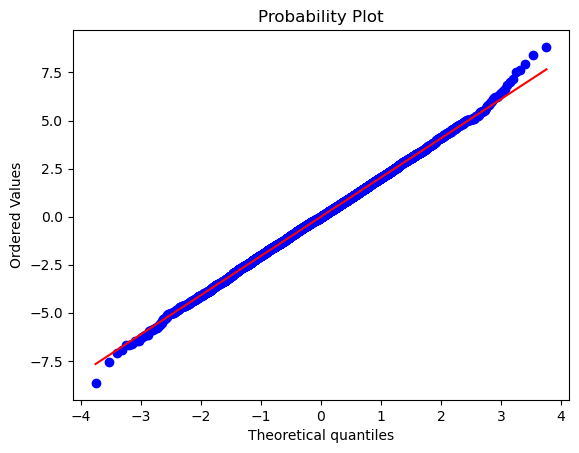

In [36]:
import scipy.stats as stats

stats.probplot(model.resid, plot = plt)
plt.show()

Inference
* We can see the residuals are normally distributed

We will perform a statistical test to get the proof of the normality.

In [39]:
pvalue = stats.shapiro(model.resid)[1]

if pvalue >0.05:
    print('fail to reject the ho')
else:
    print('reject the ho')

fail to reject the ho


Inference: The Assumption of normality is met

#### Summary
* assumtion 1: number target: met
* assumtion 2: multicolinearity: met
* assumtion 3: Linearity: met
* assumtion 4: Autocorrelation: met
* assumtion 5: homoskedascity: met
* assumtion 6: Normal residiuals:  met

### Validating our Model

In [62]:
def validation(test,pred,data):
    r2 = r2_score(test,pred)
    print('r2', r2)
    n = student.shape[0]
    k = student.shape[1]
    r2_adj = 1-((1-r2)*(n-1)/(n-k-1))
    print('adj R2',r2_adj)
    print('Mean squared error',mean_squared_error(test,pred))
    print('Root mean squared error',np.sqrt(mean_squared_error(test,pred)))
    print('Mean Absolute error',mean_absolute_error(test,pred))
    print('Mean Absolute Percentage error', mean_absolute_percentage_error(test,pred))

In [63]:
# train dataset

pred_train = model.predict(x_train_c)

In [64]:
validation(y_train,pred_train,x_test_c)

r2 0.9889033042773491
adj R2 0.9888966415960385
Mean squared error 4.164148459949527
Root mean squared error 2.040624526940105
Mean Absolute error 1.6161649478038003
Mean Absolute Percentage error 0.03470738056445307


In [65]:
# test dataset

pred_test = model.predict(x_test_c)

In [66]:
validation(y_test, pred_test, x_test_c)

r2 0.9880686410711422
adj R2 0.9880614772411039
Mean squared error 4.105609215835835
Root mean squared error 2.0262302968408687
Mean Absolute error 1.622970832971089
Mean Absolute Percentage error 0.033982237310282784


Inference
* The model is a good fit with a very little variance

#### Lets make some predictions


In [70]:
hrs_studied = 2
pre_sco = 52
extra_act = 1
sleep_hrs = 8
sample = 2


In [73]:
model.predict(np.array([1,2,52,1,8,2]))

array([29.4651633])

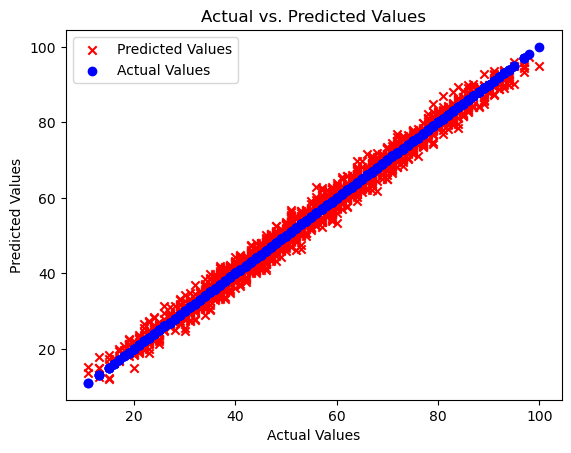

In [74]:
plt.scatter(y_test, pred_test, color='red', marker='x', label='Predicted Values')
plt.scatter(y_test, y_test, color='blue', marker='o', label='Actual Values')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()